# Python Challenge: Waves are Images - Solution
Jasper

### Step 1: Load the .wav file

In [1]:
from scipy.io import wavfile
import numpy as np


In [3]:
# Download the file and place it in the right directory
# use scipy to load .wav
_, wav_data = wavfile.read('images_are_waves.wav')


In [4]:
print(wav_data.shape) # (262144,)


(262144,)


### Step 2: Reshape the wav data into (512, 512) square matrix

look at the shape of the data, it is an 1-D array,   
however, the hint, "it's a square", indicates that the desired data is in shape of a square.  
therefore, reshape the 1-D array into a 2-D square matrix.

FYI, numbers in the screenshot shows the dimension of the square is (512 * 512).

In [7]:
wave_2d = np.array(wav_data).reshape((512,512))
wave_2d.shape


(512, 512)

### Step3: Use IDCT (inverse discrete cosine transform) to extract hidden images

The title, "Images are Waves", point us to look at images in frequency domain.  
[Discrete cosine transform (DCT)](https://en.wikipedia.org/wiki/Discrete_cosine_transform) express a signal in terms of the sum of sinusoids with different amplitudes, widely used in image compression.  
Therefore, the inverse version of DCT might extract the hidden image inside the wav data.

[This tutorial](https://stackoverflow.com/a/60794544) might help you with implementing IDCT for 2-D data.

In [9]:
from scipy.fftpack import idct
import matplotlib.pylab as plt

# implement 2D IDCT
def idct2d(input_matrix):
    return idct(idct(input_matrix.T, norm='ortho').T, norm='ortho')  


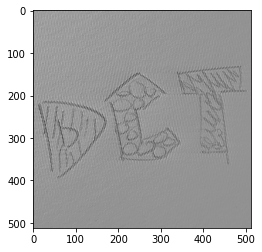

In [10]:
hidden_image = idct2d(wave_2d)

plt.imshow(hidden_image, cmap='gray')
